In [1]:
# imporint libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import precision_recall_fscore_support

In [44]:
df_train = pd.read_csv("../input/housing-prices-competition-for-kaggle-learn-users/train.csv")

In [45]:
df_trainDF = pd.DataFrame(df_train)
df_trainDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
df_test = pd.read_csv("../input/housing-prices-competition-for-kaggle-learn-users/train.csv")

In [53]:
df_testDF = pd.DataFrame(df_test)
df_testDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df_train.set_index('Id', inplace=True)

KeyError: "None of ['Id'] are in the columns"

In [55]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
print(df_train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [57]:
print(df_train.shape)

print(df_train.dtypes)

(1460, 80)
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


In [58]:
print(df_train.describe().T)

                count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712  

In [59]:
print(df_test.shape)

print(df_test.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [60]:
print(df_test.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [61]:
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
# missing values
print(df_train.isnull().sum())


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [63]:
print(df_test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [64]:
cols_with_missing = [col for col in df_train.columns
                     if df_train[col].isnull().any()]
print(cols_with_missing, 'cols_with_missing')
print(df_train.info())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] cols_with_missing
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object

In [65]:
cols_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df_train.drop(cols_to_drop, axis=1, inplace=True)
df_test.drop(cols_to_drop, axis=1, inplace=True)

In [66]:
# fill missing values
cols_with_missing = [col for col in df_train.columns if df_train[col].isnull().any()]
print(cols_with_missing, 'cols_with_missing')
print(df_train.info())

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] cols_with_missing
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgTyp

In [67]:
# fill missing values
cols_with_missing = [col for col in df_test.columns if df_test[col].isnull().any()]
print(cols_with_missing, 'cols_with_missing')
print(df_test.info())

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] cols_with_missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Conditi

In [68]:
# fill missing values
cols_with_missing = [col for col in df_train.columns if df_train[col].isnull().any()]
print(cols_with_missing, 'cols_with_missing')
print(df_train.info())

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] cols_with_missing
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgTyp

In [69]:
# fill missing values
cols_with_missing = [col for col in df_test.columns if df_test[col].isnull().any()]
print(cols_with_missing, 'cols_with_missing')
print(df_test.info())

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] cols_with_missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Conditi

In [70]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [71]:
# Remove rows with missing target, separate target from predictors
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

In [72]:
X = df_train.drop(['SalePrice'], axis=1)
          

In [73]:
y = df_test['SalePrice'] 

In [75]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == "object"]

# Concating columns
my_cols = categorical_cols + numerical_cols

# Copying datasets
X_data = X[my_cols].copy()
X_test = df_test[my_cols].copy()

In [78]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=
                       [('preprocessor', preprocessor),
                        ('model', model)])

In [79]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())


Average MAE score: 17625.206253424658


In [90]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['MSZoning'] = le.fit_transform(df_train['MSZoning'])
df_test['MSZoning'] = le.fit_transform(df_test['MSZoning'])

df_train['Street'] = le.fit_transform(df_train['Street'])
df_test['Street'] = le.fit_transform(df_test['Street'])

df_train['LotShape'] = le.fit_transform(df_train['LotShape'])
df_test['LotShape'] = le.fit_transform(df_test['LotShape'])

df_train['LandContour'] = le.fit_transform(df_train['LandContour'])
df_test['LandContour'] = le.fit_transform(df_test['LandContour'])

df_train['Utilities'] = le.fit_transform(df_train['Utilities'])
df_test['Utilities'] = le.fit_transform(df_test['Utilities'])

df_train['LotConfig'] = le.fit_transform(df_train['LotConfig'])
df_test['LotConfig'] = le.fit_transform(df_test['LotConfig'])

df_train['LandSlope'] = le.fit_transform(df_train['LandSlope'])
df_test['LandSlope'] = le.fit_transform(df_test['LandSlope'])

df_train['Neighborhood'] = le.fit_transform(df_train['Neighborhood'])
df_test['Neighborhood'] = le.fit_transform(df_test['Neighborhood'])


df_train['Condition1'] = le.fit_transform(df_train['Condition1'])
df_test['Condition1'] = le.fit_transform(df_test['Condition1'])

df_train['Condition2'] = le.fit_transform(df_train['Condition2'])
df_test['Condition2'] = le.fit_transform(df_test['Condition2'])

df_train['BldgType'] = le.fit_transform(df_train['BldgType'])
df_test['BldgType'] = le.fit_transform(df_test['BldgType'])

df_train['HouseStyle'] = le.fit_transform(df_train['HouseStyle'])
df_test['HouseStyle'] = le.fit_transform(df_test['HouseStyle'])

df_train['RoofStyle'] = le.fit_transform(df_train['RoofStyle'])
df_test['RoofStyle'] = le.fit_transform(df_test['RoofStyle'])

df_train['RoofMatl'] = le.fit_transform(df_train['RoofMatl'])
df_test['RoofMatl'] = le.fit_transform(df_test['RoofMatl'])

df_train['Exterior1st'] = le.fit_transform(df_train['Exterior1st'])
df_test['Exterior1st'] = le.fit_transform(df_test['Exterior1st'])

df_train['Exterior2nd'] = le.fit_transform(df_train['Exterior2nd'])
df_test['Exterior2nd'] = le.fit_transform(df_test['Exterior2nd'])

df_train['MasVnrType'] = le.fit_transform(df_train['MasVnrType'])
df_test['MasVnrType'] = le.fit_transform(df_test['MasVnrType'])

df_train['ExterQual'] = le.fit_transform(df_train['ExterQual'])
df_test['ExterQual'] = le.fit_transform(df_test['ExterQual'])

df_train['ExterCond'] = le.fit_transform(df_train['ExterCond'])
df_test['ExterCond'] = le.fit_transform(df_test['ExterCond'])

df_train['Foundation'] = le.fit_transform(df_train['Foundation'])
df_test['Foundation'] = le.fit_transform(df_test['Foundation'])

df_train['BsmtQual'] = le.fit_transform(df_train['BsmtQual'])
df_test['BsmtQual'] = le.fit_transform(df_test['BsmtQual'])

df_train['BsmtCond'] = le.fit_transform(df_train['BsmtCond'])
df_test['BsmtCond'] = le.fit_transform(df_test['BsmtCond'])

df_train['BsmtExposure'] = le.fit_transform(df_train['BsmtExposure'])
df_test['BsmtExposure'] = le.fit_transform(df_test['BsmtExposure'])

df_train['BsmtFinType1'] = le.fit_transform(df_train['BsmtFinType1'])
df_test['BsmtFinType1'] = le.fit_transform(df_test['BsmtFinType1'])

df_train['BsmtFinType2'] = le.fit_transform(df_train['BsmtFinType2'])
df_test['BsmtFinType2'] = le.fit_transform(df_test['BsmtFinType2'])


df_train['Heating'] = le.fit_transform(df_train['Heating'])
df_test['Heating'] = le.fit_transform(df_test['Heating'])


df_train['HeatingQC'] = le.fit_transform(df_train['HeatingQC'])
df_test['HeatingQC'] = le.fit_transform(df_test['HeatingQC'])

df_train['CentralAir'] = le.fit_transform(df_train['CentralAir'])
df_test['CentralAir'] = le.fit_transform(df_test['CentralAir'])

df_train['Electrical'] = le.fit_transform(df_train['Electrical'])
df_test['Electrical'] = le.fit_transform(df_test['Electrical'])

df_train['KitchenQual'] = le.fit_transform(df_train['KitchenQual'])
df_test['KitchenQual'] = le.fit_transform(df_test['KitchenQual'])

df_train['Functional'] = le.fit_transform(df_train['Functional'])
df_test['Functional'] = le.fit_transform(df_test['Functional'])

df_train['GarageType'] = le.fit_transform(df_train['GarageType'])
df_test['GarageType'] = le.fit_transform(df_test['GarageType'])

df_train['GarageFinish'] = le.fit_transform(df_train['GarageFinish'])
df_test['GarageFinish'] = le.fit_transform(df_test['GarageFinish'])

df_train['GarageQual'] = le.fit_transform(df_train['GarageQual'])
df_test['GarageQual'] = le.fit_transform(df_test['GarageQual'])


df_train['GarageCond'] = le.fit_transform(df_train['GarageCond'])
df_test['GarageCond'] = le.fit_transform(df_test['GarageCond'])

df_train['PavedDrive'] = le.fit_transform(df_train['PavedDrive'])
df_test['PavedDrive'] = le.fit_transform(df_test['PavedDrive'])

df_train['SaleType'] = le.fit_transform(df_train['SaleType'])
df_test['SaleType'] = le.fit_transform(df_test['SaleType'])

df_train['SaleCondition'] = le.fit_transform(df_train['SaleCondition'])
df_test['SaleCondition'] = le.fit_transform(df_test['SaleCondition'])


In [96]:
# missing value for EnclosedPorch

df_train['EnclosedPorch'].fillna(df_train['EnclosedPorch'].mean(), inplace=True)
df_test['EnclosedPorch'].fillna(df_test['EnclosedPorch'].mean(), inplace=True)


In [97]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [98]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [109]:
def haveScore(n_estimators):
    my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, df_train, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()


results = {}
for i in range(3,8):
    results[50*i] = haveScore(50*i)

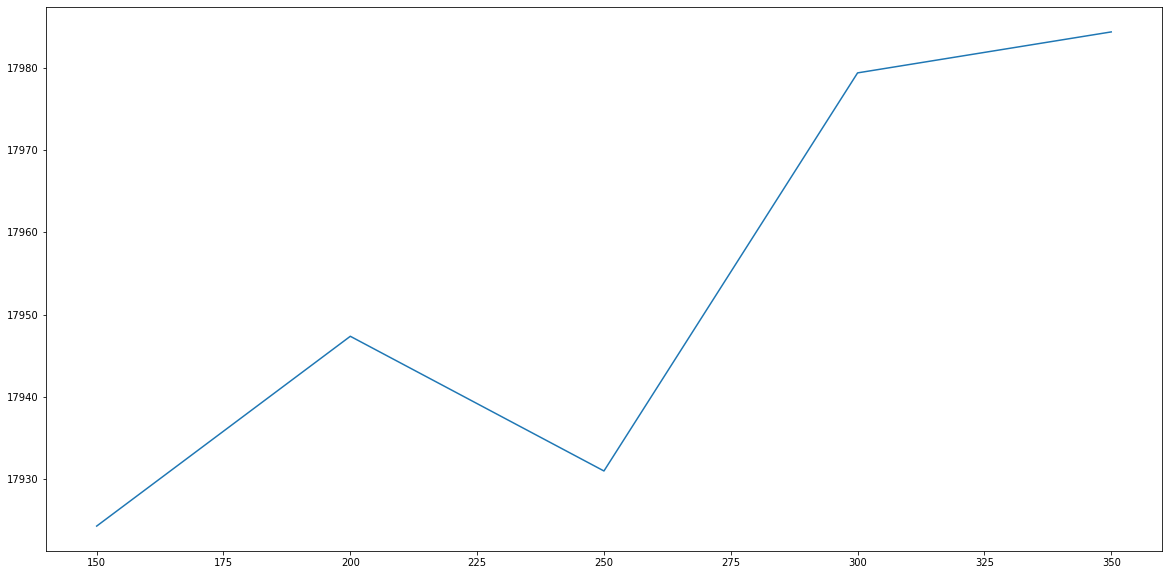

In [112]:
import xgboost as xgb

In [123]:
# Define model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])
# Preprocessing of training data, fit model
my_pipeline.fit(df_train, y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(df_test)

preds

array([206977.48, 181164.  , 221228.61, ..., 265976.66, 142357.4 ,
       147835.02], dtype=float32)

In [124]:
model = RandomForestRegressor(n_estimators=300, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=
                       [('preprocessor', preprocessor),
                        ('model', model)])

In [126]:
# Save test predictions to file
output = pd.DataFrame({'Id': df_test.Id,
                          'SalePrice': preds})
output.to_csv('submission.csv', index=False)